## Import Libraries

In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [4]:
df = pd.read_csv("house_prices.csv")

In [5]:
df.head()

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Geo_Address,Lat,Lon
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara","Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246
2,Kelaniya - House on 20P Land for sale for sale,"Posted on 17 Nov 5:19 pm, Kelaniya, Gampaha","Rs 20,000,000",Kelaniya- Ranaviru Maldeniya Road,2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha","Kelaniya- Biyagama road, Ranaviru Maladeniya R...",https://ikman.lk/en/ad/kelaniya-house-on-20p-l...,Provident Paradise (Pvt) Ltd,Member,2021-11-17 17:19:00,"Kelaniya, Gampaha, Sri Lanka",79.914926,6.951178
3,House For Sale in Pamankada Lane Wellawatte Co...,"Posted on 17 Nov 5:07 pm, Colombo 6, Colombo","Rs 187,000,000",Pamankada Lane Wellawatte Colombo.06,5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo",22 Perches House For Sale in Pamankada Lane We...,https://ikman.lk/en/ad/house-for-sale-in-paman...,Colombo Construction Property Developers,Premium-Member,2021-11-17 17:07:00,"Colombo 6, Colombo, Sri Lanka",80.016670,6.866670
4,House For Sale - Attidiya for sale,"Posted on 17 Nov 5:06 pm, Dehiwala, Colombo","Rs 1,300,000",MainRoad Attidiya,1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo",*à¶ à¶­à·à¶­à·à¶©à·à¶º à¶´à·âà¶»à¶¯à·à·...,https://ikman.lk/en/ad/house-for-sale-attidiya...,Lakdinu Houses,Member,2021-11-17 17:06:00,"Dehiwala, Colombo, Sri Lanka",79.880242,6.838232


## Data Cleaning

In [6]:
# Converting Columns into numbers
# Return nan for prices which are listed as negotiable
def extract_num(row):
    try:
        return float(re.sub("[^0-9\.]", "", row))
    except Exception as e:
        print(e)
        np.nan

In [7]:
df["Price"] = df["Price"].apply(extract_num)
df["Land size"] = df["Land size"].apply(extract_num)
df["House size"] = df["House size"].apply(extract_num)

In [8]:
df["City"] = df["Location"].apply(lambda x: x.split(",")[0])
df["District"] = df["Location"].apply(lambda x: x.split(",")[-1])
df = df.drop("Location", axis=1)

In [9]:
df.head()

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Description,Post_URL,Seller_name,Seller_type,published_date,Geo_Address,Lat,Lon,City,District
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara",5400000.0,"Gangodagama Roard,Hakmana,Matara.",1,50.0,3,1600.0,"Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670,Matara City,Matara
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo",16800000.0,Athurugiriya Galwarusapare,3,8.0,3,1480.0,*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246,Athurugiriya,Colombo
2,Kelaniya - House on 20P Land for sale for sale,"Posted on 17 Nov 5:19 pm, Kelaniya, Gampaha",20000000.0,Kelaniya- Ranaviru Maldeniya Road,2,20.0,3,2800.0,"Kelaniya- Biyagama road, Ranaviru Maladeniya R...",https://ikman.lk/en/ad/kelaniya-house-on-20p-l...,Provident Paradise (Pvt) Ltd,Member,2021-11-17 17:19:00,"Kelaniya, Gampaha, Sri Lanka",79.914926,6.951178,Kelaniya,Gampaha
3,House For Sale in Pamankada Lane Wellawatte Co...,"Posted on 17 Nov 5:07 pm, Colombo 6, Colombo",187000000.0,Pamankada Lane Wellawatte Colombo.06,5,22.0,5,4000.0,22 Perches House For Sale in Pamankada Lane We...,https://ikman.lk/en/ad/house-for-sale-in-paman...,Colombo Construction Property Developers,Premium-Member,2021-11-17 17:07:00,"Colombo 6, Colombo, Sri Lanka",80.016670,6.866670,Colombo 6,Colombo
4,House For Sale - Attidiya for sale,"Posted on 17 Nov 5:06 pm, Dehiwala, Colombo",1300000.0,MainRoad Attidiya,1,6.3,2,900.0,*à¶ à¶­à·à¶­à·à¶©à·à¶º à¶´à·âà¶»à¶¯à·à·...,https://ikman.lk/en/ad/house-for-sale-attidiya...,Lakdinu Houses,Member,2021-11-17 17:06:00,"Dehiwala, Colombo, Sri Lanka",79.880242,6.838232,Dehiwala,Colombo


### EDA

In [10]:
# check stats of dataset
df.describe()

,Price,Land size,House size,Lat,Lon
count,1.532700e+04,15327.000000,15327.000000,15327.000000,15327.000000
mean,3.534340e+07,16.726143,2770.713588,79.979304,6.908008
std,4.513401e+07,102.990449,2194.920377,0.177783,0.243448
min,3.600000e+03,0.000000,0.000000,79.795675,5.941424
25%,1.650000e+07,7.800000,1650.000000,79.913892,6.801844
50%,2.600000e+07,10.000000,2500.000000,79.940789,6.866670
75%,3.950000e+07,14.150000,3300.000000,80.000000,6.935757
max,1.900000e+09,5445.000000,120000.000000,81.822554,9.673491


In [11]:
# Checking the null values 
df.isnull().sum()

Title                0
Sub_title            0
Price                0
Address           4136
Baths                0
Land size            0
Beds                 0
House size           0
Description          0
Post_URL             0
Seller_name          0
Seller_type          0
published_date       0
Geo_Address          0
Lat                  0
Lon                  0
City                 0
District             0
dtype: int64

### Data Visualization

In [12]:
df['District'].value_counts()

  Colombo         10977
  Gampaha          2908
  Galle             336
  Kalutara          309
  Kandy             247
  Kurunegala        136
  Matara             77
  Kegalle            47
  Anuradhapura       37
  Ratnapura          37
  Badulla            33
  Hambantota         31
  Puttalam           30
  Matale             29
  Batticaloa         22
  Jaffna             19
  Monaragala         13
  Nuwara Eliya       12
  Polonnaruwa        10
  Ampara             10
  Trincomalee         3
  Mannar              2
  Mullativu           1
  Vavuniya            1
Name: District, dtype: int64

In [13]:
df[["Title", "District"]].groupby('District').agg(['count'])['Title']['count'].sort_values(ascending=False)

District
  Colombo         10977
  Gampaha          2908
  Galle             336
  Kalutara          309
  Kandy             247
  Kurunegala        136
  Matara             77
  Kegalle            47
  Anuradhapura       37
  Ratnapura          37
  Badulla            33
  Hambantota         31
  Puttalam           30
  Matale             29
  Batticaloa         22
  Jaffna             19
  Monaragala         13
  Nuwara Eliya       12
  Polonnaruwa        10
  Ampara             10
  Trincomalee         3
  Mannar              2
  Mullativu           1
  Vavuniya            1
Name: count, dtype: int64

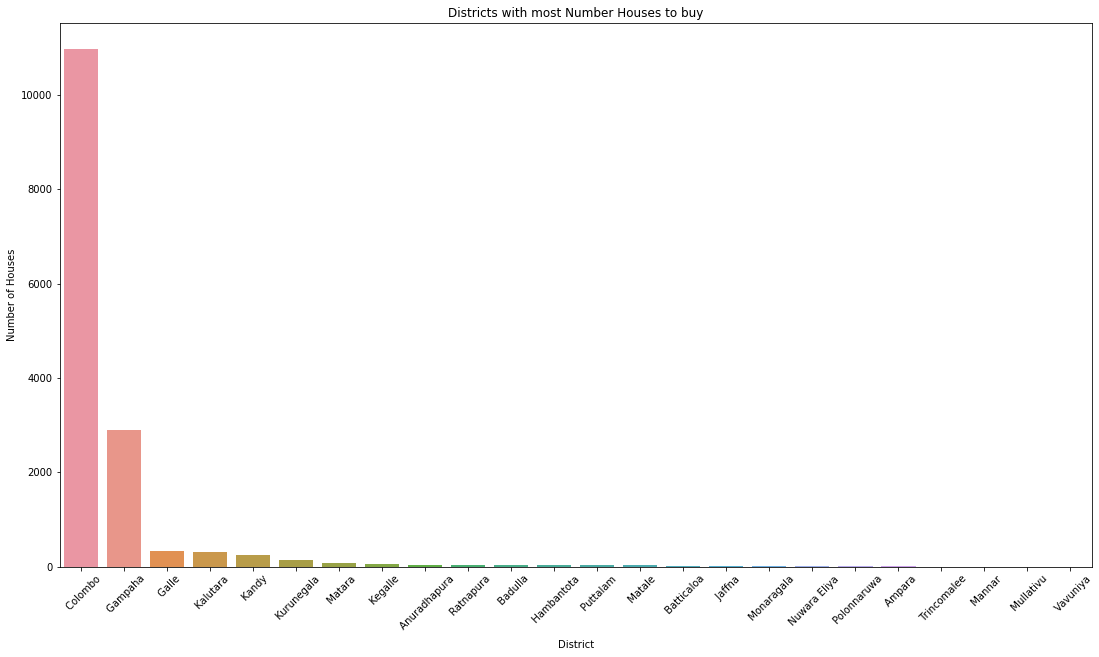

In [14]:
# District with most properties to buy

top_d_type = df[["Title", "District"]].groupby("District").agg(['count'])['Title']['count'].sort_values(ascending=False)
ax = sns.barplot( x = top_d_type.index, y = top_d_type.values)
ax.set_xticklabels(labels=top_d_type.index , rotation=45)
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
ax.set_ylabel("Number of Houses")
ax.set_xlabel("District")
ax.set_title("Districts with most Number Houses to buy");

In [15]:
df['City'].value_counts()[:10]

 Piliyandala     2806
 Malabe          1590
 Negombo         1363
 Talawatugoda    1296
 Kottawa          750
 Athurugiriya     654
 Battaramulla     536
 Nugegoda         393
 Kadawatha        327
 Homagama         318
Name: City, dtype: int64

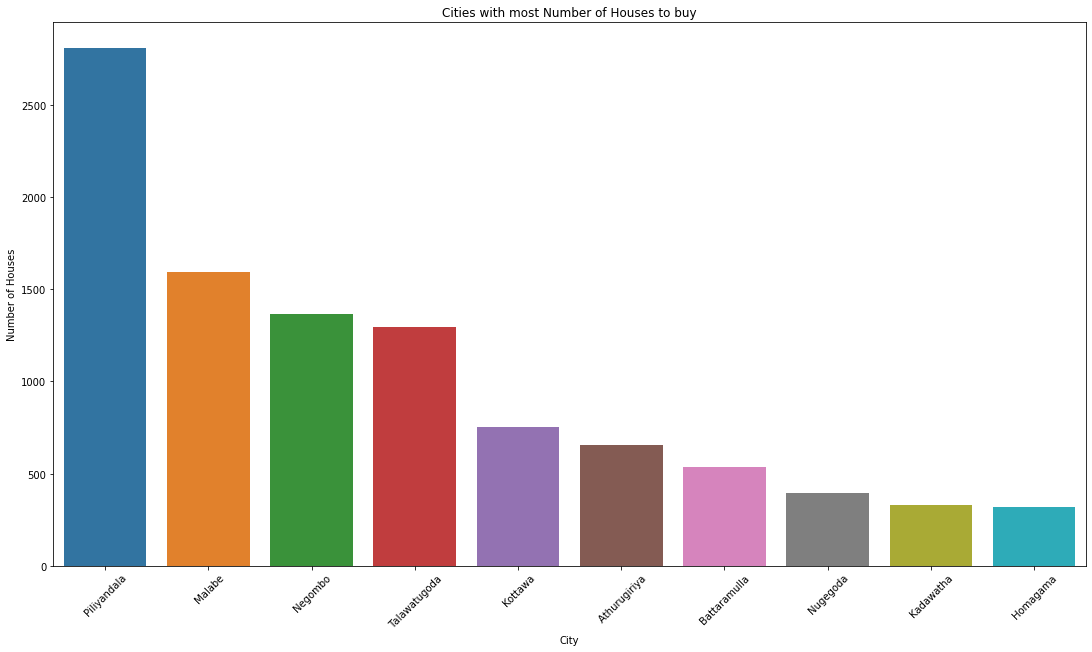

In [16]:
# Top 10 Cities with most number properties to buy

top_d_type = df[["Title", "City"]].groupby("City").agg(['count'])['Title']['count'].sort_values(ascending=False)[:10]
ax = sns.barplot( x = top_d_type.index, y = top_d_type.values)
ax.set_xticklabels(labels=top_d_type.index , rotation=45)
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
ax.set_ylabel("Number of Houses")
ax.set_xlabel("City")
ax.set_title("Cities with most Number of Houses to buy");

In [17]:
df.nlargest(10, columns='Price')['City']

1035       Pannipitiya
13774      Pannipitiya
4708      Battaramulla
11692            Kotte
5231      Battaramulla
9235         Colombo 7
3455         Colombo 7
4145         Colombo 7
2010           Kandana
1982         Colombo 7
Name: City, dtype: object

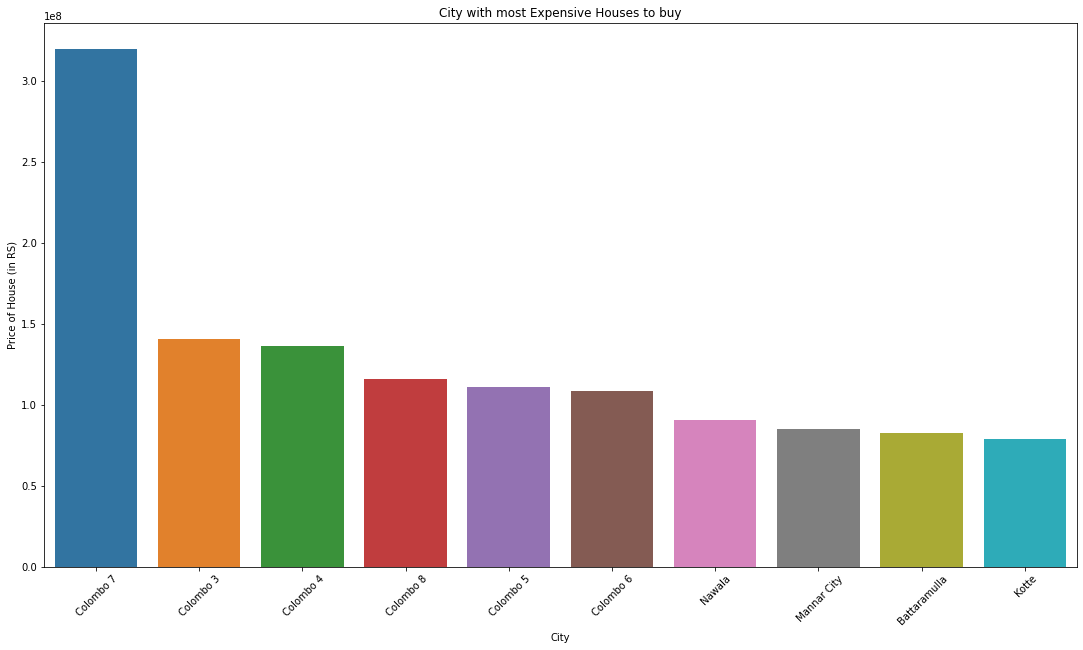

In [18]:
# Top 10 Cities with most expensive properties to buy

top_d_type = df[["Price", "City"]].groupby("City").agg(['mean'])['Price']['mean'].sort_values(ascending=False)[:10]
ax = sns.barplot( x = top_d_type.index, y = top_d_type.values)
ax.set_xticklabels(labels=top_d_type.index , rotation=45)
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
ax.set_ylabel("Price of House (in RS)")
ax.set_xlabel("City")
ax.set_title("City with most Expensive Houses to buy");

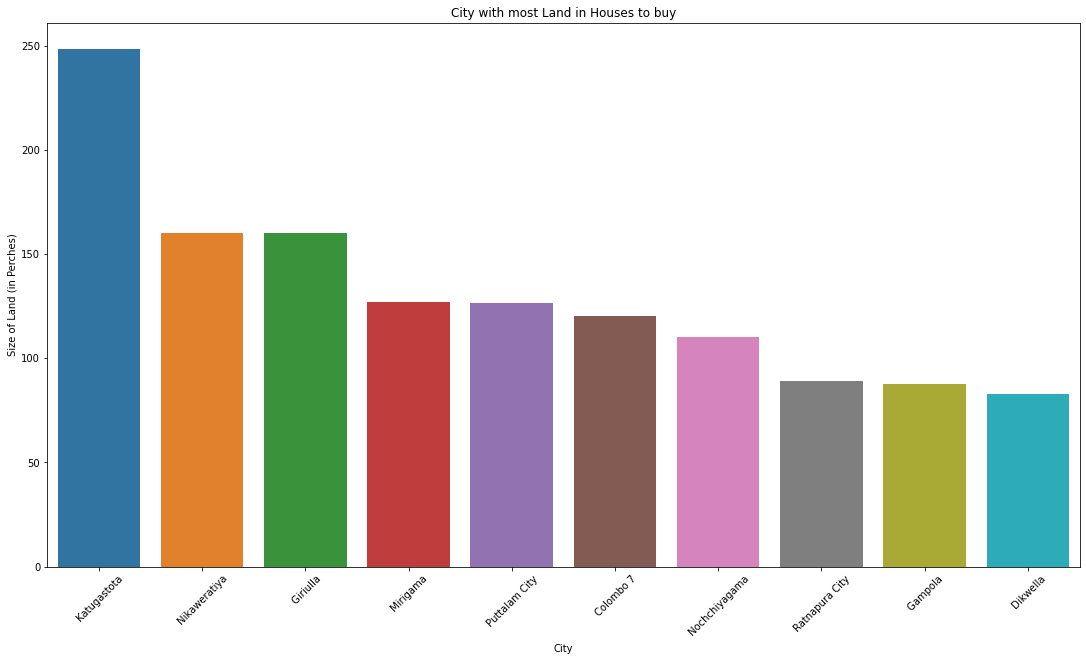

In [19]:
# Top 10 Cities with most land in the properties to buy

top_d_type = df[["Land size", "City"]].groupby("City").agg(['mean'])['Land size']['mean'].sort_values(ascending=False)[:10]
ax = sns.barplot( x = top_d_type.index, y = top_d_type.values)
ax.set_xticklabels(labels=top_d_type.index , rotation=45)
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
ax.set_ylabel("Size of Land (in Perches)")
ax.set_xlabel("City")
ax.set_title("City with most Land in Houses to buy");

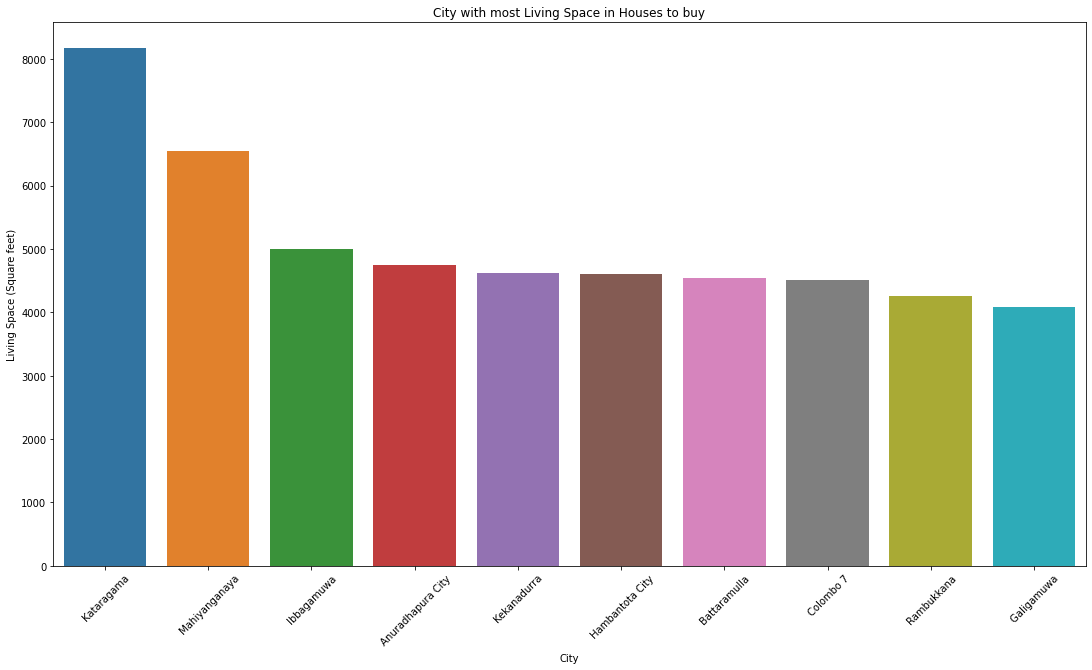

In [20]:
# Top 10 Cities with most living space in the properties to buy

top_d_type = df[["House size", "City"]].groupby("City").agg(['mean'])['House size']['mean'].sort_values(ascending=False)[:10]
ax = sns.barplot( x = top_d_type.index, y = top_d_type.values)
ax.set_xticklabels(labels=top_d_type.index , rotation=45)
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)
ax.set_ylabel("Living Space (Square feet)")
ax.set_xlabel("City")
ax.set_title("City with most Living Space in Houses to buy");

### Visualize Destinations on a map

In [21]:
folium_map = folium.Map(location=[7.8731, 80.7718],
                        zoom_start=8,
                        tiles='CartoDB dark_matter')

df_map = df[df['Lat'].notna() & df['Lon'].notna() ]

FastMarkerCluster(data=list(zip(df_map['Lon'].values, df_map['Lat'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map